In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import fileprocessing
import numpy as np
import pybedtools

In [2]:
hmm_track = pd.read_csv('../annotations/GM12878.csv')

In [4]:
hmm_track.head()

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM4,HMM5,HMM6,HMM5_2
0,chr1,0,50000,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,NaN,0.447314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,NaN,0.410796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bed_dir = '/pollard/data/functional_genomics/encode'

In [6]:
beds = fileprocessing.get_files(bed_dir, 'bed.gz')

In [7]:
beds_df = fileprocessing.beds_df(beds)
beds_df.head()

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
0,keratinocyte,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,GRCh38,released,CTCF,None,"Vishwanath Iyer, UTA","rep1,2",ENCFF028IIR.bed.gz,/pollard/data/functional_genomics/encode/kerat...
1,keratinocyte,ChIP-seq,bed narrowPeak,peaks and background as input for IDR,GRCh38,released,CTCF,None,"Vishwanath Iyer, UTA","rep1,2",ENCFF465MVV.bed.gz,/pollard/data/functional_genomics/encode/kerat...
2,keratinocyte,ChIP-seq,bed narrowPeak,peaks and background as input for IDR,GRCh38,released,CTCF,None,"Vishwanath Iyer, UTA",rep1,ENCFF301UPP.bed.gz,/pollard/data/functional_genomics/encode/kerat...
3,keratinocyte,ChIP-seq,bed narrowPeak,peaks and background as input for IDR,GRCh38,released,CTCF,None,"Vishwanath Iyer, UTA",rep2,ENCFF623KYU.bed.gz,/pollard/data/functional_genomics/encode/kerat...
4,keratinocyte,ChIP-seq,bed narrowPeak,conservative idr thresholded peaks,hg19,released,CTCF,None,"Vishwanath Iyer, UTA","rep1,2",ENCFF226MQR.bed.gz,/pollard/data/functional_genomics/encode/kerat...


In [18]:
gm_df = beds_df[(beds_df.cell_line == 'GM12878') & (beds_df.assembly == 'hg19')].reset_index(drop=True)

In [20]:
gm_df

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
0,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,hg19,released,TAF1,None,"Richard Myers, HAIB","rep1,2",ENCFF544NRC.bed.gz,/pollard/data/functional_genomics/encode/GM128...
1,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,hg19,released,ASH2L,None,"Bradley Bernstein, Broad","rep1,2",ENCFF917CXD.bed.gz,/pollard/data/functional_genomics/encode/GM128...
2,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,hg19,released,POLR2AphosphoS2,None,"Michael Snyder, Stanford","rep1,2",ENCFF630NFM.bed.gz,/pollard/data/functional_genomics/encode/GM128...
3,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,hg19,released,MAX,None,"Michael Snyder, Stanford","rep1,2",ENCFF083KVY.bed.gz,/pollard/data/functional_genomics/encode/GM128...
4,GM12878,ChIP-seq,bed narrowPeak,optimal idr thresholded peaks,hg19,released,UBTF,None,"Michael Snyder, Stanford","rep1,2",ENCFF745TNJ.bed.gz,/pollard/data/functional_genomics/encode/GM128...
...,...,...,...,...,...,...,...,...,...,...,...,...
717,GM12878,ChIP-seq,bed narrowPeak,conservative idr thresholded peaks,hg19,released,CHD1,None,"Michael Snyder, Stanford","rep1,2",ENCFF924GMH.bed.gz,/pollard/data/functional_genomics/encode/GM128...
718,GM12878,ChIP-seq,bed narrowPeak,conservative idr thresholded peaks,hg19,released,TCF12,None,"Michael Snyder, Stanford","rep1,2",ENCFF237IPT.bed.gz,/pollard/data/functional_genomics/encode/GM128...
719,GM12878,ChIP-seq,bed narrowPeak,conservative idr thresholded peaks,hg19,released,SRF,None,"Richard Myers, HAIB","rep1,2",ENCFF593FGJ.bed.gz,/pollard/data/functional_genomics/encode/GM128...
720,GM12878,ChIP-seq,bed narrowPeak,pseudoreplicated idr thresholded peaks,hg19,released,EGR1,None,"Richard Myers, HAIB",rep3,ENCFF618EFD.bed.gz,/pollard/data/functional_genomics/encode/GM128...


In [40]:
gm_df.output_type.unique()

array(['optimal idr thresholded peaks', 'replicated peaks', 'peaks',
       'conservative idr thresholded peaks',
       'pseudoreplicated idr thresholded peaks'], dtype=object)

In [53]:
replicated_gm_df = gm_df[gm_df.output_type=='replicated peaks'].reset_index(drop=True)
replicated_gm_df

,cell_line,assay,file_format,output_type,assembly,file_status,target,biosample_treatment,lab,replicate,file_name,file_location
0,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K27ac,None,"Bradley Bernstein, Broad","rep1,2",ENCFF816AHV.bed.gz,/pollard/data/functional_genomics/encode/GM128...
1,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K4me3,None,"Bradley Bernstein, Broad","rep1,2",ENCFF795URC.bed.gz,/pollard/data/functional_genomics/encode/GM128...
2,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K4me3,None,"Bradley Bernstein, Broad","rep1,2",ENCFF295GNH.bed.gz,/pollard/data/functional_genomics/encode/GM128...
3,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K9ac,None,"Bradley Bernstein, Broad","rep1,2",ENCFF052MHA.bed.gz,/pollard/data/functional_genomics/encode/GM128...
4,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K79me2,None,"Bradley Bernstein, Broad","rep1,2",ENCFF357HZM.bed.gz,/pollard/data/functional_genomics/encode/GM128...
5,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H4K20me1,None,"Bradley Bernstein, Broad","rep1,2",ENCFF308WNH.bed.gz,/pollard/data/functional_genomics/encode/GM128...
6,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K4me2,None,"Bradley Bernstein, Broad","rep1,2",ENCFF983SMS.bed.gz,/pollard/data/functional_genomics/encode/GM128...
7,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K36me3,None,"John Stamatoyannopoulos, UW","rep1,2",ENCFF479XLN.bed.gz,/pollard/data/functional_genomics/encode/GM128...
8,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K4me1,None,"Bradley Bernstein, Broad","rep1,2",ENCFF921LKB.bed.gz,/pollard/data/functional_genomics/encode/GM128...
9,GM12878,ChIP-seq,bed narrowPeak,replicated peaks,hg19,released,H3K27me3,None,"John Stamatoyannopoulos, UW","rep1,2",ENCFF851UKZ.bed.gz,/pollard/data/functional_genomics/encode/GM128...


In [52]:
replicated_gm_df.target.unique()

array(['H3K27ac', 'H3K4me3', 'H3K9ac', 'H3K79me2', 'H4K20me1', 'H3K4me2',
       'H3K36me3', 'H3K4me1', 'H3K27me3', 'H2AFZ'], dtype=object)

In [74]:
columns=["chrom", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]

In [648]:
histone_df = pybedtools.BedTool(replicated_gm_df.iloc[0].file_location).to_dataframe() #H3K9ac
histone_df.columns = columns

In [649]:
histone_df

,chrom,start,end,name,score,strand,signalValue,pValue,qValue,peak
0,chr10,100120775,100121137,Peak_39088,25,.,5.60204,7.85031,5.85067,252
1,chr10,100150620,100150889,Peak_40106,24,.,5.66096,7.54285,5.55318,126
2,chr10,100163182,100165180,Peak_13312,86,.,11.88600,30.32199,27.75451,343
3,chr10,100169007,100169354,Peak_30255,33,.,7.36385,10.50644,8.40555,174
4,chr10,100171522,100172092,Peak_42620,23,.,5.27429,6.99607,5.02882,200
...,...,...,...,...,...,...,...,...,...,...
57364,chrX,9979060,9979463,Peak_54559,18,.,4.19110,5.39405,3.50660,239
57365,chrX,9979654,9980117,Peak_40963,24,.,5.66096,7.54285,5.55318,260
57366,chrX,9982176,9982548,Peak_38815,26,.,5.51629,7.99793,5.98500,149
57367,chrY,17994724,17995047,Peak_21492,51,.,8.23779,17.40049,15.11806,159


## Let's take a look by eye, notice the depletion of histone value at Maa regions

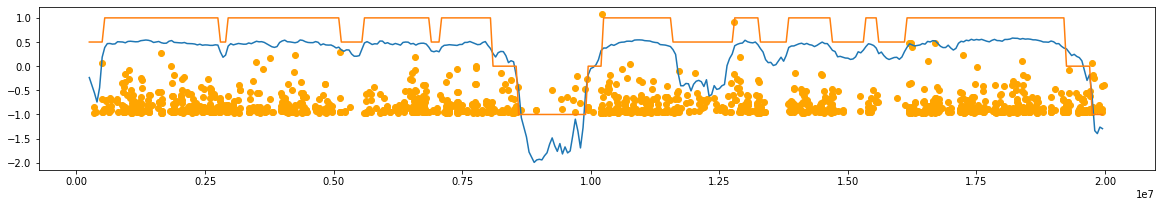

In [650]:
plt.figure(figsize=(20, 3))
chrom = 'chr19'
max_start = 20000000
mask_hmm = (~hmm_track.E1.isna()) & (hmm_track.chrom == chrom) & (hmm_track.start < max_start)
x_hmm = hmm_track[mask_hmm].start.values
E  = hmm_track[mask_hmm].E1.values
signal_hmm = hmm_track[mask_hmm].HMM5_2.values/2 -1
plt.plot(x_hmm, E)
plt.plot(x_hmm, signal_hmm)

mask_hist = (histone_df.chrom == chrom) & (histone_df.start < max_start)
x_hist = histone_df[mask_hist].start.values
signal = histone_df[mask_hist].score.values/400 - 1
plt.scatter(x_hist, signal, c="orange")

In [651]:
from bioframe.util import bedtools
def bedtools_intersect_basePairs(left, right, rsuffix='_', **kwargs):
    """
    >>> ixn = bedtools_intersect(bed1, bed2, wao=True), needed to delete other keys b/c they clashed
   """
    out = bedtools.intersect(a=left, b=right,wao=True)
    out.columns = list(left.columns) + [c+rsuffix if c in left.columns else c for c in right.columns] + ['bpOverlap']
    out.score = out.score.replace('.', '0')
    out.score = out.score.astype('float')
    return out

In [652]:
inter= bedtools_intersect_basePairs(hmm_track, histone_df)
inter.head()

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,...,start_,end_,name,score,strand,signalValue,pValue,qValue,peak,bpOverlap
0,chr1,0,50000,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,...,-1,-1,.,0.0,.,.,.,.,.,0
1,chr1,50000,100000,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,...,-1,-1,.,0.0,.,.,.,.,.,0
2,chr1,100000,150000,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,...,-1,-1,.,0.0,.,.,.,.,.,0
3,chr1,150000,200000,NaN,0.447314,NaN,NaN,NaN,NaN,NaN,...,-1,-1,.,0.0,.,.,.,.,.,0
4,chr1,200000,250000,NaN,0.410796,NaN,NaN,NaN,NaN,NaN,...,-1,-1,.,0.0,.,.,.,.,.,0


In [653]:
scores_df = hmm_track.copy()
scores_df['score'] = inter.groupby(['chrom', 'start'], as_index=False, sort=False).agg('sum').score
scores_df

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM4,HMM5,HMM6,HMM5_2,score
0,chr1,0,50000,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,chr1,50000,100000,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,chr1,100000,150000,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,chr1,150000,200000,NaN,0.447314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,chr1,200000,250000,NaN,0.410796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61923,chrY,59200000,59250000,NaN,0.388820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
61924,chrY,59250000,59300000,NaN,0.398220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
61925,chrY,59300000,59350000,NaN,0.479240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
61926,chrY,59350000,59373566,NaN,0.563615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [654]:
def state_to_state(state_from, state_to, states, hmm):
    return states.iloc[np.where( (np.diff(states[hmm].values)== (state_to-state_from)) &  (states[hmm].values[:-1] == state_from) ) [0] ]

In [658]:
a_to_maa = state_to_state(4, 3, hmm_track, 'HMM5_2')
a_to_maa.head()

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM4,HMM5,HMM6,HMM5_2
75,chr1,3750000,3800000,0.008597,0.49208,0.445389,0.447891,0.343097,1.0,1.0,2.0,3.0,4.0,5.0,4.0
139,chr1,6950000,7000000,0.008147,0.47468,0.418972,0.812342,0.384265,1.0,1.0,2.0,3.0,4.0,5.0,4.0
250,chr1,12500000,12550000,0.007806,0.43116,0.530976,0.601165,0.459936,1.0,1.0,2.0,3.0,4.0,5.0,4.0
281,chr1,14050000,14100000,0.008548,0.40708,0.738209,0.186435,0.430050,1.0,1.0,2.0,3.0,4.0,5.0,4.0
358,chr1,17900000,17950000,0.008835,0.54392,0.369572,1.056878,0.500999,1.0,1.0,2.0,3.0,4.0,5.0,4.0


In [659]:
def get_windows(indexes, halfwins= 5):
    return np.array([ np.arange(index- halfwins + 1, index + halfwins +1) for index in indexes])

In [660]:
def filter_windows(windows, hmm_signal, max_diff=2):
    half_length = windows.shape[1]//2
    stacked_values = hmm_signal[windows]
    left_val = stacked_values[0][half_length-1]
    right_val = stacked_values[0][half_length]
    fake_signal = np.array(([left_val]*half_length + [right_val]*half_length))[None, :]
    hasNaN = (stacked_values == stacked_values).sum(axis=1) != stacked_values.shape[1]    
    diff = np.abs(stacked_values - fake_signal).sum(axis = 1)
    return windows[ (diff <= max_diff) & (~hasNaN)] 

In [714]:
halfwin = 10
windows = get_windows(a_to_maa.index, halfwin)
windows = filter_windows(windows, scores_df.HMM5_2.values, max_diff=0)

In [715]:
stacked_values = scores_df.score.values[windows]

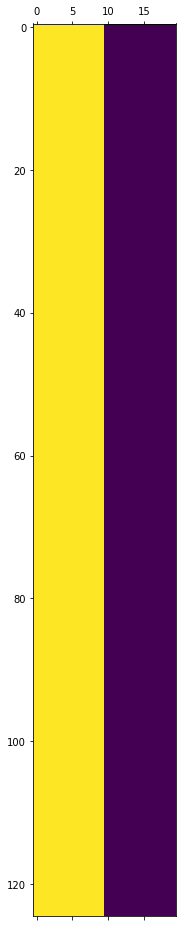

In [716]:
plt.matshow(scores_df.HMM3.values[windows]) #Plot HMM to check signal quality

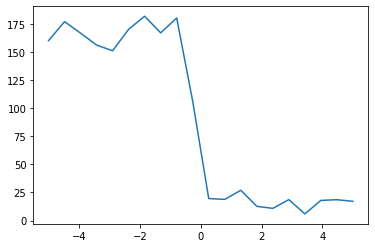

In [717]:
plt.plot(np.linspace(-halfwin/2, halfwin/2, 2*halfwin) ,stacked_values.mean(axis=0))